<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230118_Tinder_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/05/24/tinder-reviews-sentiment-analysis-using-python/

In [14]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re
import string

import matplotlib.pyplot as plt

from google.colab import files
import io
import zipfile

In [2]:
upload = files.upload()

Saving Tinder_Review.zip to Tinder_Review.zip


In [3]:
z = zipfile.ZipFile(io.BytesIO(upload['Tinder_Review.zip']))
z.namelist()

['tinder_google_play_reviews.csv']

In [4]:
data = pd.read_csv(z.open(z.namelist()[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570821 entries, 0 to 570820
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              570821 non-null  object
 1   userName              570817 non-null  object
 2   userImage             570821 non-null  object
 3   content               569481 non-null  object
 4   score                 570821 non-null  int64 
 5   thumbsUpCount         570821 non-null  int64 
 6   reviewCreatedVersion  452647 non-null  object
 7   at                    570821 non-null  object
 8   replyContent          47251 non-null   object
 9   repliedAt             47251 non-null   object
dtypes: int64(2), object(8)
memory usage: 43.6+ MB


In [5]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,7ce6ad6c-a22a-4946-ba53-9e0410cace38,James Haynes,https://play-lh.googleusercontent.com/a-/AD5-W...,still not sure about this app.. I have yet to ...,3,0,13.24.1,2023-01-13 01:53:16,NaN,NaN
1,90566c6d-1e34-432c-aa98-8d4580ff7b2f,Ashwin Ramesh,https://play-lh.googleusercontent.com/a/AEdFTp...,Banned for unknown reasons. Support teams woul...,1,0,NaN,2023-01-13 01:52:11,NaN,NaN
2,13a937f3-bca8-4ed2-87ac-2024cf43283a,Will Cook,https://play-lh.googleusercontent.com/a/AEdFTp...,Only gives me matches before my account needs ...,1,0,13.23.0,2023-01-13 01:43:57,NaN,NaN
3,03173698-ea71-4b03-bbe3-bd5d230c1c5d,Ram Dobwal,https://play-lh.googleusercontent.com/a-/AD5-W...,it's good,3,0,13.24.1,2023-01-13 01:33:00,NaN,NaN
4,7234a7c5-ce12-41c5-a350-1b6b1a60b48f,Dom “Skoooch”,https://play-lh.googleusercontent.com/a-/AD5-W...,Edit: made a new account and was blocked after...,1,1,13.16.0,2023-01-13 01:25:47,NaN,NaN


In [6]:
data.isnull().sum()

reviewId                     0
userName                     4
userImage                    0
content                   1340
score                        0
thumbsUpCount                0
reviewCreatedVersion    118174
at                           0
replyContent            523570
repliedAt               523570
dtype: int64

In [20]:
data = data[['content']]
data.head()

,content
0,still not sure about this app.. I have yet to ...
1,Banned for unknown reasons. Support teams woul...
2,Only gives me matches before my account needs ...
3,it's good
4,Edit: made a new account and was blocked after...


In [21]:
data.isnull().sum()

content    1340
dtype: int64

In [22]:
data.dropna(inplace=True)

In [11]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.+\S+', '', text)
  text = re.sub(r'<.*>+', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopwords]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [23]:
data['content'] = data.content.apply(clean)

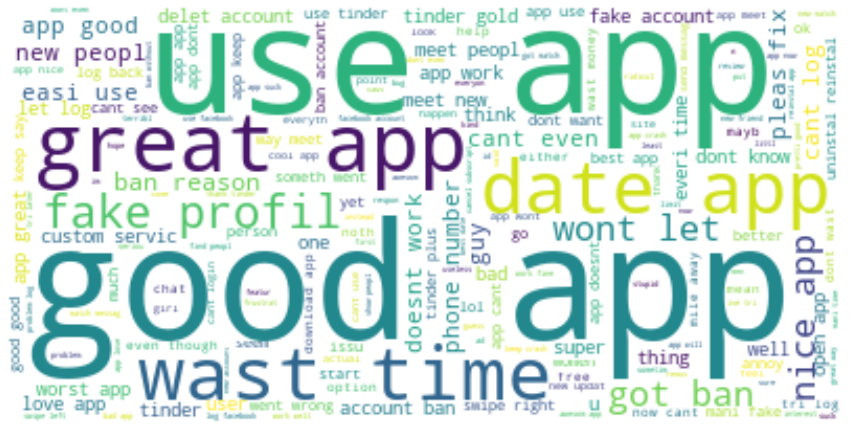

In [24]:
text = ' '.join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['content']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['content']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['content']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['content']]

In [28]:
final = data[['content', 'Positive', 'Negative', 'Neutral', 'Compound']]
final.head()

,content,Positive,Negative,Neutral,Compound
0,still sure app yet talk real person mayb pay idk,0.190,0.231,0.579,0.1280
1,ban unknown reason support team wouldnt give r...,0.156,0.208,0.636,-0.2263
2,give match account need renew,0.000,0.000,1.000,0.0000
3,good,1.000,0.000,0.000,0.4404
4,edit made new account block hour normal use r...,0.068,0.165,0.766,-0.5493


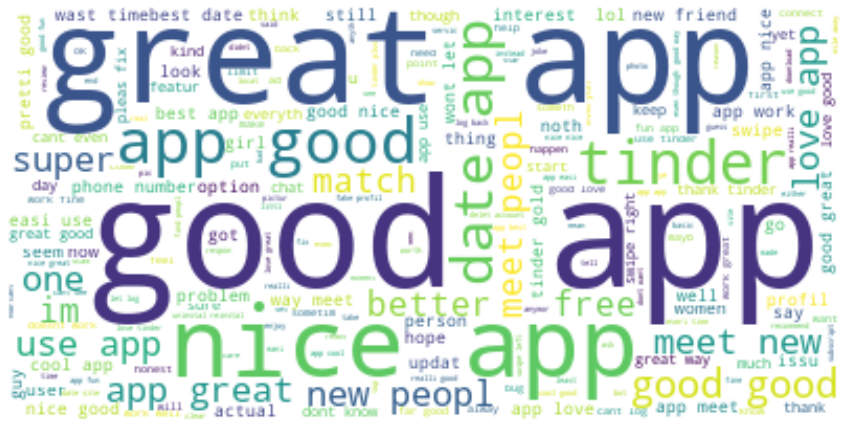

In [29]:
positive = ' '.join([i for i in data['content'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

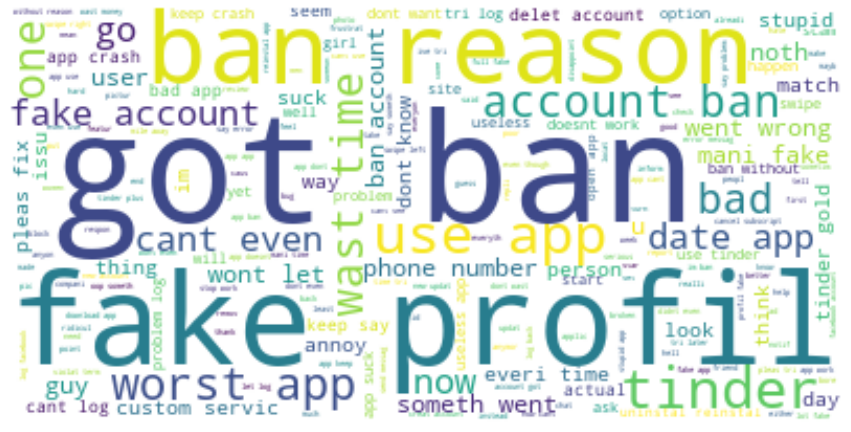

In [31]:
negative = ' '.join([i for i in data['content'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [33]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  160338.1190000187
Negative:  65252.521999996905
Neutral:  337321.4379999564
